
# Introduction
For this project, I decided to chosse the titanic project. It contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. I will analyse the data and try to answer the following questions:
1. what is the survival rate
2. what is the survival rate based on one criteria (gender, age, social class)
3. what is the survival rate based on 2 criterias (gender, age, social class)

## Import the dataset
First I import the data using the panda libray:

In [1]:

#import numpy as np
import pandas as pd
import seaborn as sns #for nice graphs
import matplotlib.pyplot as plt # for standard graphs
import matplotlib as mpl
%matplotlib inline

# Loading the dataset
dataset = 'titanic_data.csv'
full_dataset = pd.read_csv(dataset)

# Print the first lines
full_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the Kaggle website, each column is as follow:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data check

Let's check the data

In [2]:
pd.DataFrame(full_dataset.count())

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


So we have 891 entries as expected, only 714 for the age and 204 for the cabin data.
To anaswer the questions, we can clean the data we don't need. For the "age" information, I will filter the data and keep only the 714 with age information.

Now I will create a new subset of data with only the data I'm interested in.

In [3]:
# Remove the unwanted columns
full_dataset_cleaned = full_dataset.drop(['Name','Ticket','Cabin','Fare','Embarked'], axis=1)
full_dataset_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


## Answer to question 1: what is the survival rate?
Let's start with an easy question: what is the survival rate?
This is the breakdown of survival date:

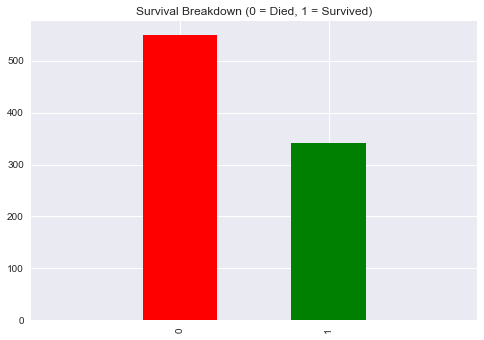

In [4]:

mpl.style.use('seaborn')
plt.figure(figsize=(8,6))
fig, axis = plt.subplots()
full_dataset_cleaned.Survived.value_counts().plot(kind='bar', color="rg")
axis.set_xlim(-1, len(full_dataset_cleaned.Survived.value_counts())) 
plt.title("Survival Breakdown (0 = Died, 1 = Survived)")

In [5]:
survived = (full_dataset_cleaned[full_dataset_cleaned['Survived'] == True]).count()
print("The global survival rate is {}%".format(survived['Survived']/full_dataset_cleaned['Survived'].count()))
full_dataset_cleaned.Survived.value_counts()

The global survival rate is 0.3838383838383838%


0    549
1    342
Name: Survived, dtype: int64

## Answer to question 2: what is the survival rate based on one criteria (gender, age, social class)?

### Impact of gender

Now let's see the impact of the gender to this survival rate.


        Survived
Sex             
female  0.742038
male    0.188908
As we can see, women had a higher rate of survival


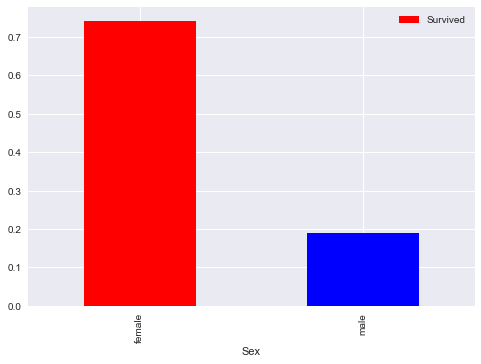

In [6]:
survivability_per_sex_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['Sex'])['Survived'].mean())
print(survivability_per_sex_percentage)
survivability_per_sex_percentage.plot(kind='bar', color="rb")
print('As we can see, women had a higher rate of survival')

### Impact of the social class

Pclass          1         2         3
Survived  0.62963  0.472826  0.242363


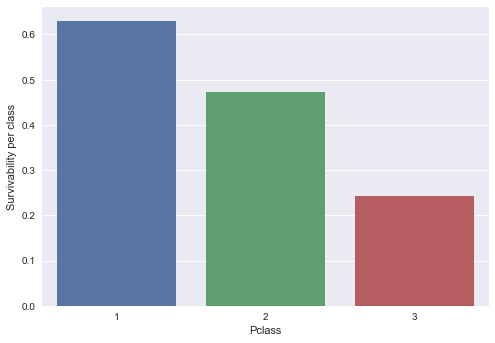

In [7]:
survivability_per_class_percentage= pd.DataFrame(full_dataset_cleaned.groupby('Pclass')['Survived'].mean()).T
print(survivability_per_class_percentage)

def visualize_surv_barplot(df):
    ax = sns.barplot(data=df)
    ax.set_ylabel("Survivability per class")
    
visualize_surv_barplot(survivability_per_class_percentage)

The survival rate based on the single criteria "PClass", we can conclude that people travelling in the first class had a much better chance of survival (due to the fact that the 

### Impact of the age

In [8]:

# To visualize the survival rate based on age, we need to split the age column into categories. 
# For this, we will add a column "AgeGroup" to the dataset with the following groups:
# Baby : 0 to 2
# Child : 2 to 12
# Teenage: 12 to 18
# Adult: 18 to 60
# Senior: > 60
full_dataset_cleaned['AgeGroup'] =  pd.cut(full_dataset_cleaned['Age'], [0,2, 12, 18, 59, 100], labels=["baby", "child", "teenager","adult", "senior"])
full_dataset_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,AgeGroup
0,1,0,3,male,22.0,1,0,adult
1,2,1,1,female,38.0,1,0,adult
2,3,1,3,female,26.0,0,0,adult
3,4,1,1,female,35.0,1,0,adult
4,5,0,3,male,35.0,0,0,adult


          Survived
AgeGroup          
baby      0.625000
child     0.555556
teenager  0.428571
adult     0.387978
senior    0.269231
As we can see, the survival rate is highly depending on the age group: the younger you are, the better chance to survive you have


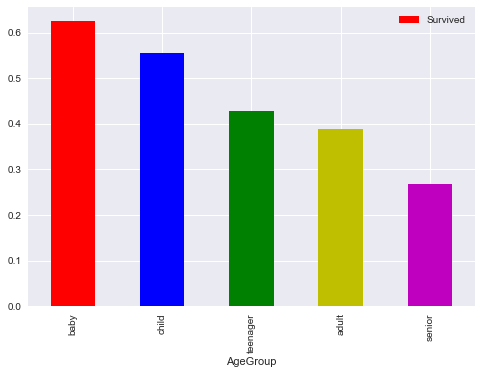

In [9]:
survivability_per_age_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['AgeGroup'])['Survived'].mean())
print(survivability_per_age_percentage)
survivability_per_age_percentage.plot(kind='bar', color="rbgym")
print('As we can see, the survival rate is highly depending on the age group: the younger you are, the better chance to survive you have')

### Impact of  Parent/children criteria

       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
people with parent/children on board had a better chance of surviving between 1 and 3. Above 4 the survivability rates goes down.


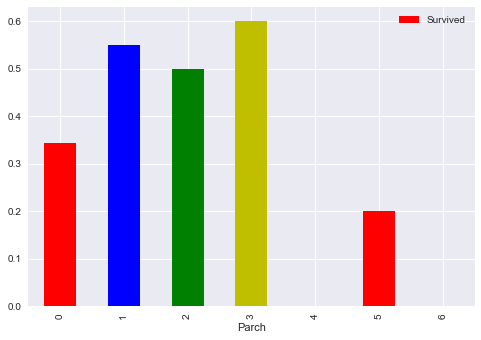

In [19]:
survivability_per_parch_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['Parch'])['Survived'].mean())
print(survivability_per_parch_percentage)
survivability_per_parch_percentage.plot(kind='bar', color="rbgym")
print('people with parent/children on board had a better chance of surviving between 1 and 3. Above 4 the survivability rates goes down.')

### Impact of Sibling/Partner criteria 

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
people with parent/children on board had a better chance of surviving between 1 and 3. Above 4 the survivability rates goes down.


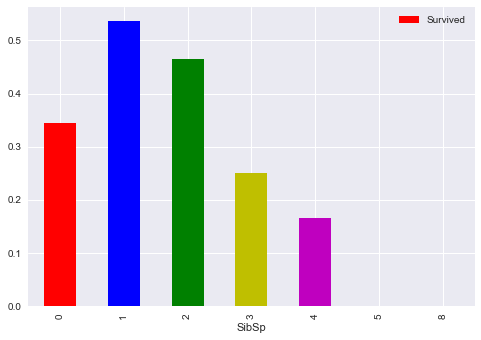

In [20]:
survivability_per_sibsp_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['SibSp'])['Survived'].mean())
print(survivability_per_sibsp_percentage)
survivability_per_sibsp_percentage.plot(kind='bar', color="rbgym")
print('people with parent/children on board had a better chance of surviving between 1 and 3. Above 4 the survivability rates goes down.')

# Answer to question 3: what is the survival rate based on two criterias (gender, age, social class)?
## Criteria (Gender / Social class)

               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447
As we can see, women had a higher rate of survival in the first and second class


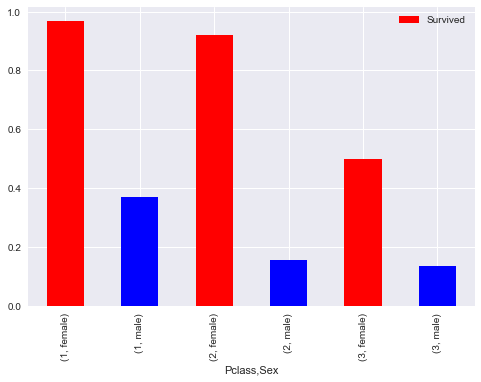

In [10]:
survivability_per_sex_class_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['Pclass', 'Sex',])['Survived'].mean())
print(survivability_per_sex_class_percentage)
survivability_per_sex_class_percentage.plot(kind='bar', color="rb")
print('As we can see, women had a higher rate of survival in the first and second class')

## Criteria (Gender / Age group)

Let's have a look at the total number of person per group to assess the reprentativity of the %
                   Survived
AgeGroup Survived          
baby     0                9
         1               15
child    0               20
         1               25
teenager 0               40
         1               30
adult    0              336
         1              213
senior   0               19
         1                7
                 Survived
AgeGroup Sex             
baby     female  0.600000
         male    0.642857
child    female  0.590909
         male    0.521739
teenager female  0.750000
         male    0.088235
adult    female  0.777778
         male    0.183333
senior   female  1.000000
         male    0.136364
As we can see, women had a higher rate of survival independently of the age up to 12 years old, after 12 years old, the survival rate is closed the survival rate based only on the criteria "Sex".


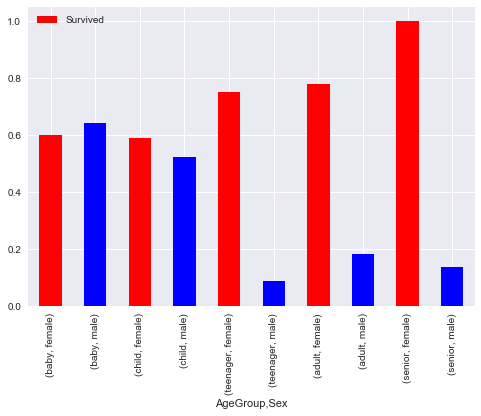

In [11]:
survivability_per_sex_AgeGroup_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['AgeGroup', 'Sex',])['Survived'].mean())
survivability_per_sex_AgeGroup_count = pd.DataFrame(full_dataset_cleaned.groupby(['AgeGroup','Survived'])['Survived'].count())

print('Let\'s have a look at the total number of person per group to assess the reprentativity of the %')
print(survivability_per_sex_AgeGroup_count)

print(survivability_per_sex_AgeGroup_percentage)
survivability_per_sex_AgeGroup_percentage.plot(kind='bar', color="rb")
print('As we can see, women had a higher rate of survival independently of the age up to 12 years old, after 12 years old, the survival rate is closed the survival rate based only on the criteria "Sex".')

### Criteria (Age group / Class)

                 Survived
Pclass AgeGroup          
1      baby      0.500000
       child     1.000000
       teenager  0.916667
       adult     0.673203
       senior    0.294118
2      baby      1.000000
       child     1.000000
       teenager  0.500000
       adult     0.421429
       senior    0.250000
3      baby      0.466667
       child     0.393939
       teenager  0.282609
       adult     0.199219
       senior    0.200000
The trend of both criteria has a cumulative effect, and does not show anything noticeable.


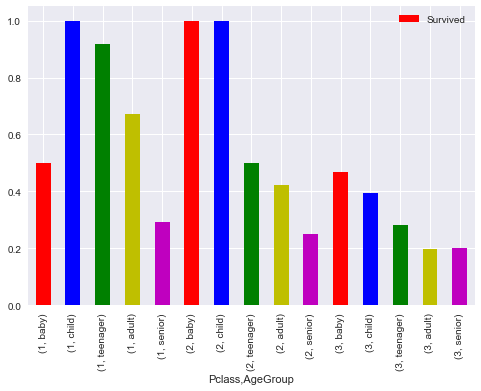

In [12]:
survivability_per_AgeGroup_Class_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['Pclass','AgeGroup'])['Survived'].mean())
print(survivability_per_AgeGroup_Class_percentage)
survivability_per_AgeGroup_Class_percentage.plot(kind='bar', color="rbgym")
print('The trend of both criteria has a cumulative effect, and does not show anything noticeable.')

### Criteria (Age group / Class)

              Survived
Parch Sex             
0     female  0.788660
      male    0.165289
1     female  0.766667
      male    0.327586
2     female  0.612245
      male    0.322581
3     female  0.750000
      male    0.000000
4     female  0.000000
      male    0.000000
5     female  0.250000
      male    0.000000
6     female  0.000000
The trend of both criteria has a cumulative effect, and does not show anything noticeable.


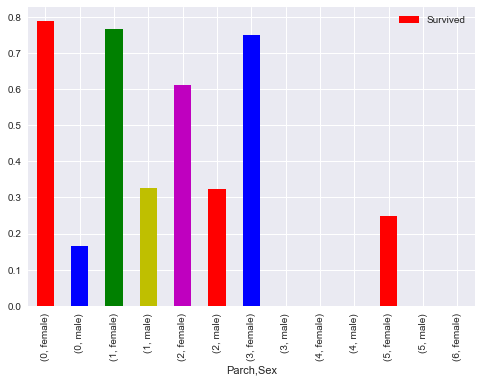

In [27]:
survivability_per_PArcSex_Class_percentage = pd.DataFrame(full_dataset_cleaned.groupby(['Parch','Sex'])['Survived'].mean())
print(survivability_per_PArcSex_Class_percentage)
survivability_per_PArcSex_Class_percentage.plot(kind='bar', color="rbgym")
print('The fact to have parent/child on board has few effect on the survivability rate for Women, but for male, to have child/parent on board raises the chance to survive')

# Conclusion
As a first conclusion that the main drivers to survive are:
1) the age (below 12)
2) the sex (to be a female or a boy under 12 years old)
3) the social class (to be in first class is better)
4) the parent/child criteria

The best survivability is for a woman, belonging to the first class (where the safety boats are sufficient), with a partner on board, and with one to two children.
